# **Getting Started with MLOps: Ensuring Reproducible ML Experiments with MLFlow**


# **Introduction**

**What is MLOps and why does it matter?**

MLOps stands for Machine Learning Operations and is a collective term for the methods, tools and processes used to manage the entire lifecycle of machine learning models from development to production. It can be seen as the equivalent of DevOps, but with focus on machine learning.



---



**Reproducibility**

One of the key components and goals of MLOps is reproducibility. Reproducibility means that every data processing, model training, and deployment should consistently give the same results when provided with the same inputs.


Reproducibility in machine learning is important for both collaboration and model reliability. Machine learning workflows often involve running many experiments with different hyperparameters, data preprocessing steps, or model architectures. Without proper tracking, results can easily get lost, making it difficult to determine which configuration performed best or to reproduce a prior experiment.

Therefore, this tutorial will focus on reproducibility, and to do this, we use a library called MLFlow.



---



**MLFlow**

MLflow is an open-source platform that helps manage the full machine learning lifecycle. It provides tools for experiment tracking, managing code and data versions, packaging models, and deploying them to various environments. In MLOps, MLflow plays a key role by ensuring reproducibility, simplifying collaboration, and streamlining the path from model development to production.



---



 **About this tutorial**

 In this tutorial you will:
- Setup environment
- Load dataset
- Build a simple ML Model
- Track experiments with MLflow
- Run multiple experiments
- Compare Results and Reproduce Experiments
- Save and Reload Model

The goal is for you to learn how MLflow helps rerun and compare experiments. But for that we first have to introduce and set up the basics, for example build and train a model.



---



# **Setup environment**







Before we dive into the main topic, we need to set up the basic environment.

First we install our required library: MLflow


In [1]:
!pip install mlflow



---


Then we have a few important libraries to import. The following code imports MLflow for experiment tracking and model management and Scikit-learn for building and evaluating a Random Forest model. It also loads the Iris dataset for demonstration.


---



In [2]:
import mlflow
import mlflow.sklearn
from mlflow.tracking import MlflowClient
from mlflow.entities import ViewType
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import logging # Removes warning messages that are unecessary for this tutorial.
logging.getLogger("mlflow").setLevel(logging.ERROR)


# **Load dataset**

Next we need to load our dataset. In this tutorial we will be using the Iris dataset. We also perform a train-test split of the data.


In [3]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42
)

# **Build a simple ML Model**

After that, we build a simple ML Model. Here we define and run the model by creating a function that trains a Random Forest classifier on the training data, makes predictions on the test set and calculates the accuracy. Then it returns the trained model, the predictions as well as the accuracy score.



In [4]:
def run_model(n_estimators, max_depth, random_state):
    # Train model
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
    clf.fit(X_train, y_train)

    # Evaluate
    predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, predictions)

    return clf, predictions, acc

# **Track experiments with MLflow**

Now it is time to run and track our machine learning experiment.

We define a function **run_experiment** that:
- Starts an MLflow run to track the experiment
- Trains a Random Forest classifier with specified hyperparameters
- Evaluates the model on the test set and calculates accuracy
- Logs parameters, metrics, and the trained model to MLflow
- Prints the run ID along with parameters and accuracy for reference




In [5]:
def run_experiment(n_estimators=100, max_depth=3):
    with mlflow.start_run():  # start an MLflow run
        clf, predictions, acc = run_model(n_estimators, max_depth, 42)

        # Log parameters and metrics explicitly (optional, autolog also does this)
        mlflow.log_param("n_estimators", n_estimators)
        mlflow.log_param("max_depth", max_depth)
        mlflow.log_metric("accuracy", acc)

        # Log model
        mlflow.sklearn.log_model(clf, "random_forest_model")

        run_id = mlflow.active_run().info.run_id
        print(f"Logged run_id: {run_id}, n_estimators={n_estimators}, max_depth={max_depth}, accuracy={acc:.4f}")
        return clf, run_id, acc

Before you actually run the experiment however, you may want to enable autologging, which is done in the code below. Above, we explicitly stated what metrics and parameters to log, while auto-logging decides that for us. We then perform the experiment.

In [7]:
mlflow.sklearn.autolog() #Enable logging for Scikit-learn models in MLflow
clf, run_id, acc = run_experiment(n_estimators=100, max_depth=4) # Run the experiment with our function.

Logged run_id: ea4a42e83603441baa6c2859acc7133c, n_estimators=100, max_depth=4, accuracy=1.0000




---


Great! You have now successfully ran and tracked a machine learning experiment with MLflow, logging the model, parameters, and performance metrics for easy reproducibility and future reference.



---



Everything will be logged in a folder in your project directory. You can find them in your folder to the left here in Google Colab as well. However, it is not necessary for this tutorial. To make it easier for you we have taken pictures to show you later on.

If you do however want to find them you can go to:
mlruns → 0 (number of experiment) → run_id of desired run.




#**Run multiple experiments**

Now it is time to test the model with different hyperparameter setting and track each experiment in MLFlow.

In this code, we call the function **run_experiment** three times with different values. We change **n_estimators** and **max_depth**. Each run trains a Random Forest model, evaluates its accuracy, logs the parameters, metrics and model to MLFlow. It then returns the **run_id** and accuracy for each experiment.



In [8]:
clf, run_id, acc = run_experiment(n_estimators=100, max_depth=3)
clf, run_id, acc = run_experiment(n_estimators=200, max_depth=5)
clf, run_id, acc = run_experiment(n_estimators=50, max_depth=2)

Logged run_id: fded1e79854b4f96b151f7bbe86ddc6a, n_estimators=100, max_depth=3, accuracy=1.0000
Logged run_id: f4b6f45f03454c09a59eebfe5d89a297, n_estimators=200, max_depth=5, accuracy=1.0000
Logged run_id: 671b1ed21de145a2a0ba4a41bd6322f6, n_estimators=50, max_depth=2, accuracy=1.0000


# **Compare results**

After we have run different experiments, it is now time to compare the results. To do this yourself you will have to run the command: **mlflow ui** in your project directory. Unfortunately this is not possible in Google Colab so instead we have included pictures to show you.


---



**Overview of all your runs**

Here you can see an overview of all your runs. They were also given names by MLFlow. You can also select which runs you want to compare.

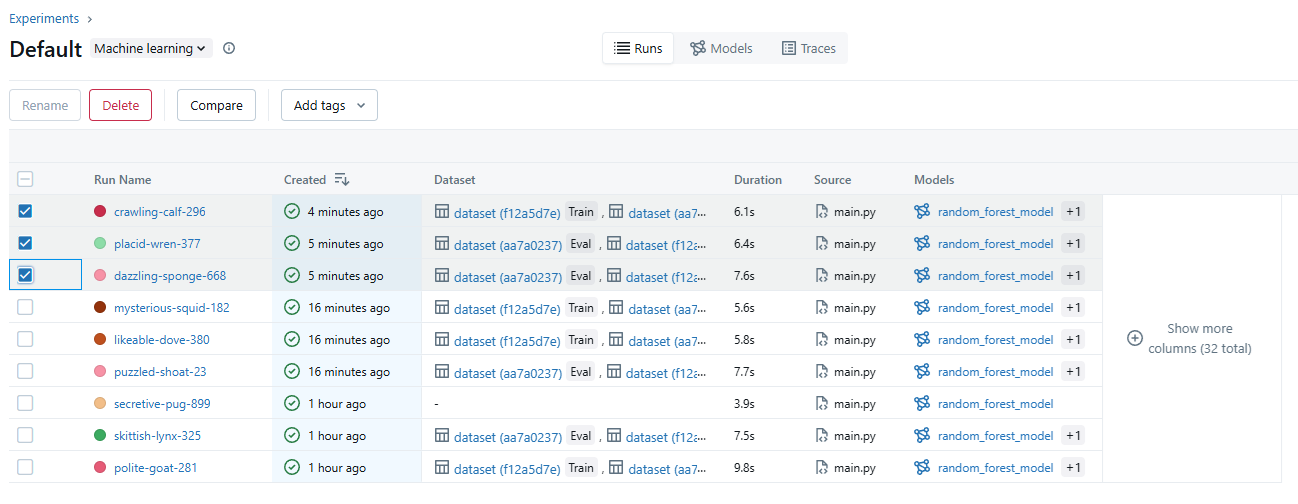



---


**Comparing performance**

By then pressing the compare button in the previous image, you will be brought to this page. Here you can easily compare all the selected runs, both their hyperparameters and their results. Thus making it easy for you to see which one performed the best for each metric.


---



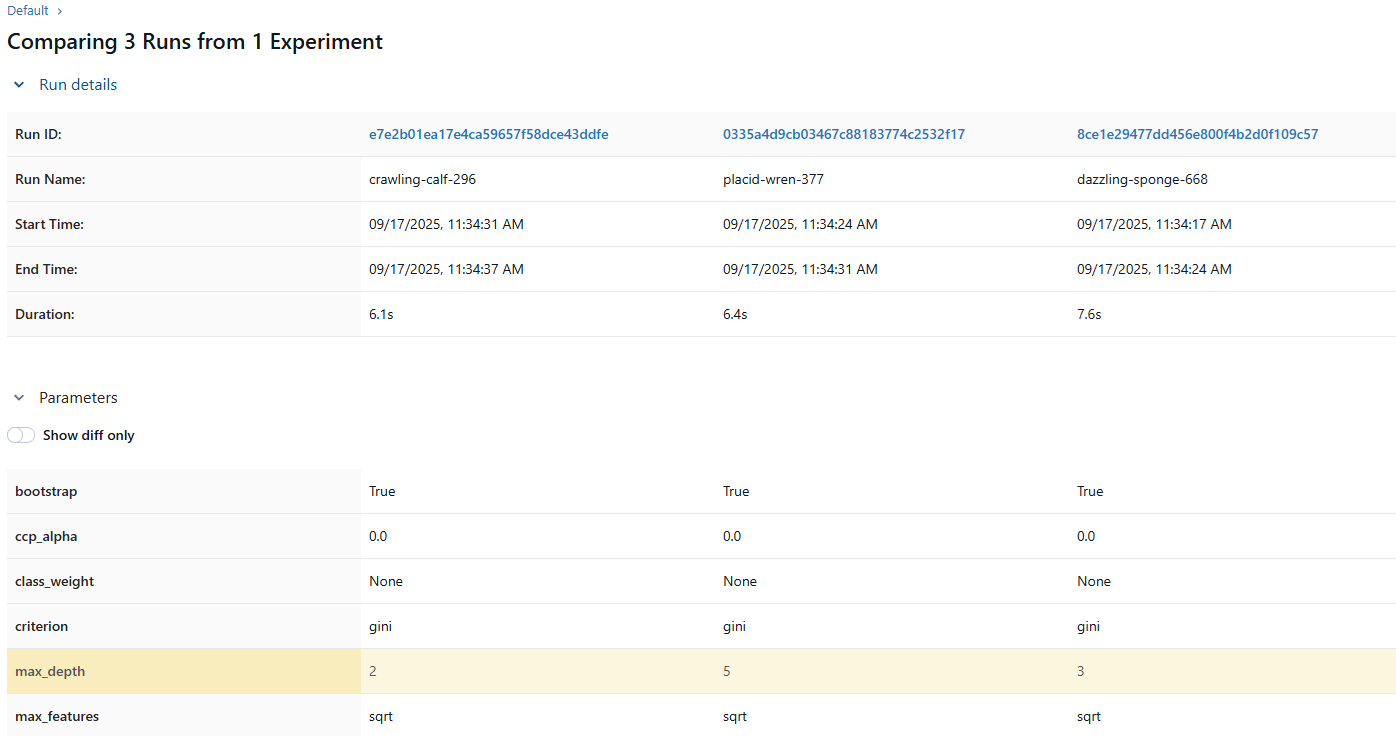

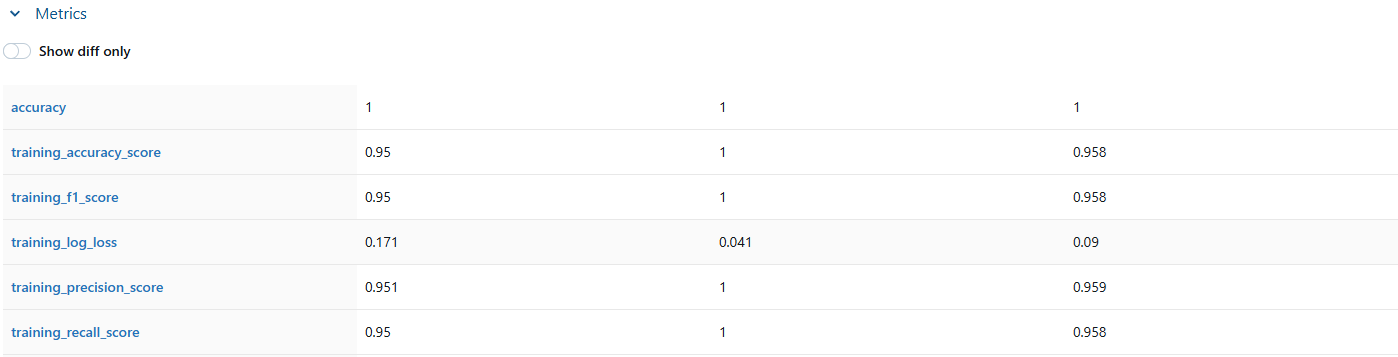

# **Reproduce experiments**

Now we are at one of the most important parts of the tutorial, reproducibility. We talked about how important it is to be able to reproduce experiments exactly like they were. We also told you how easy that is to do with MLFlow. So let's try it, shall we?

We want to reproduce the most recent experiment by using its **run_id**.

We can do this by writing a function, **rerun_experiment**, that fetches a previous run's parameters and reruns the experiment to reproduce (hopefully) the exact same results. It does this by converting the parameters to the correct types and then calls the function **run_experiment** to execute the model again.

Let's try!


In [10]:
def rerun_experiment(id):
    client = MlflowClient()

    # Fetch the previous run
    run = client.get_run(id)
    params = run.data.params

    # Convert parameters to correct types
    n_estimators = int(params.get("n_estimators", 100))
    max_depth = int(params.get("max_depth", 3))

    print(
        f"Rerunning experiment from run_id={id} "
        f"with n_estimators={n_estimators}, max_depth={max_depth}"
    )

    # Run the experiment again with the same parameters
    run_experiment(n_estimators=n_estimators, max_depth=max_depth)

In [11]:
rerun_experiment(run_id) # Here we use the most recent run, but you can specify whichever id you want as a string.

Rerunning experiment from run_id=671b1ed21de145a2a0ba4a41bd6322f6 with n_estimators=50, max_depth=2
Logged run_id: 5a3c2d18e59c4082b0e633e1f9ba4e17, n_estimators=50, max_depth=2, accuracy=1.0000




---


**Results**

If we now choose to compare these two runs, we can see the following:


---



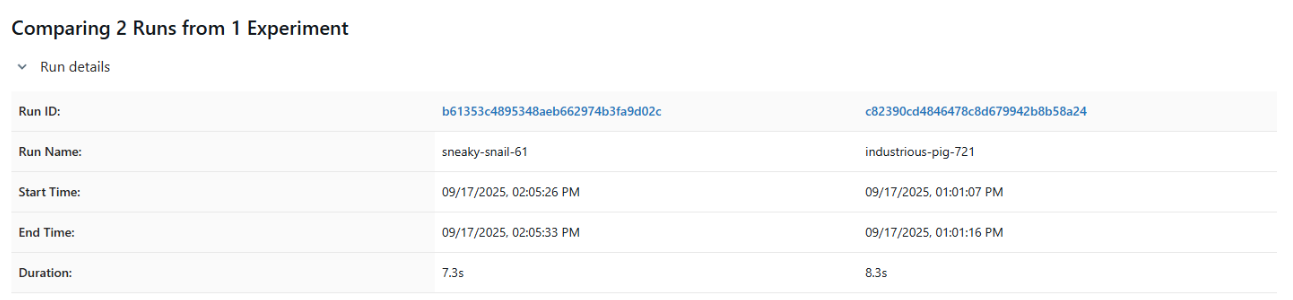

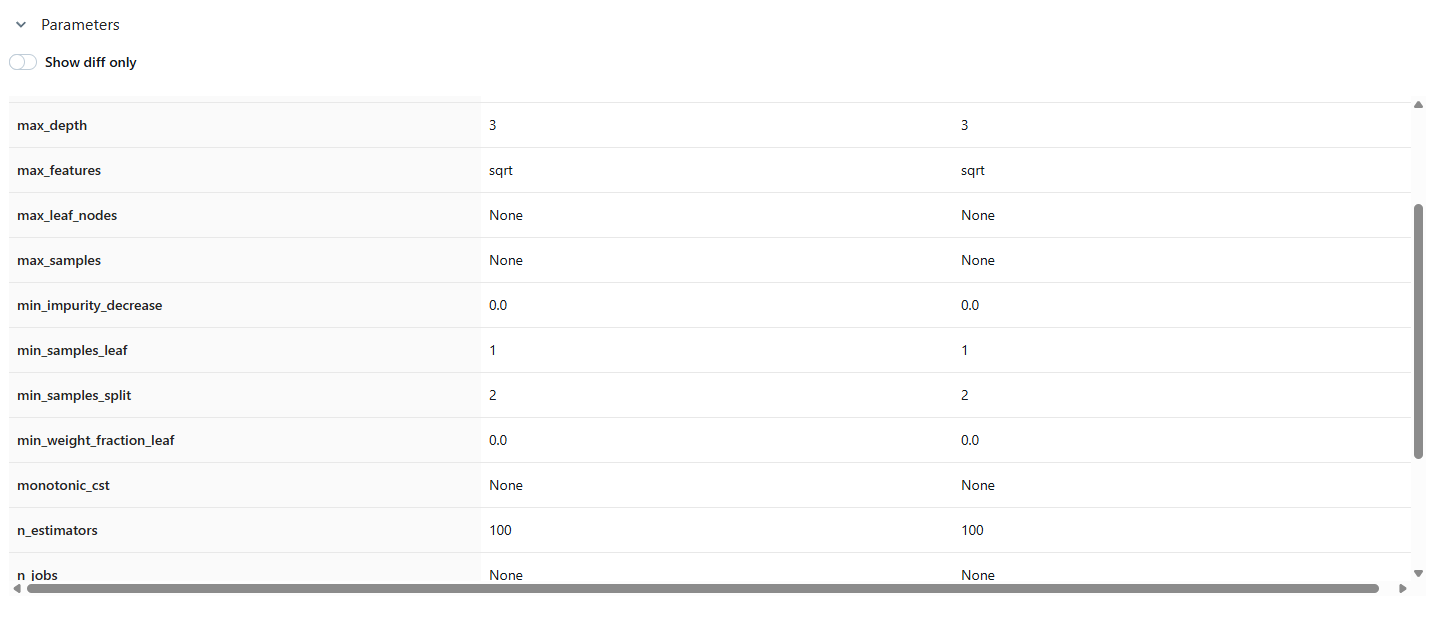

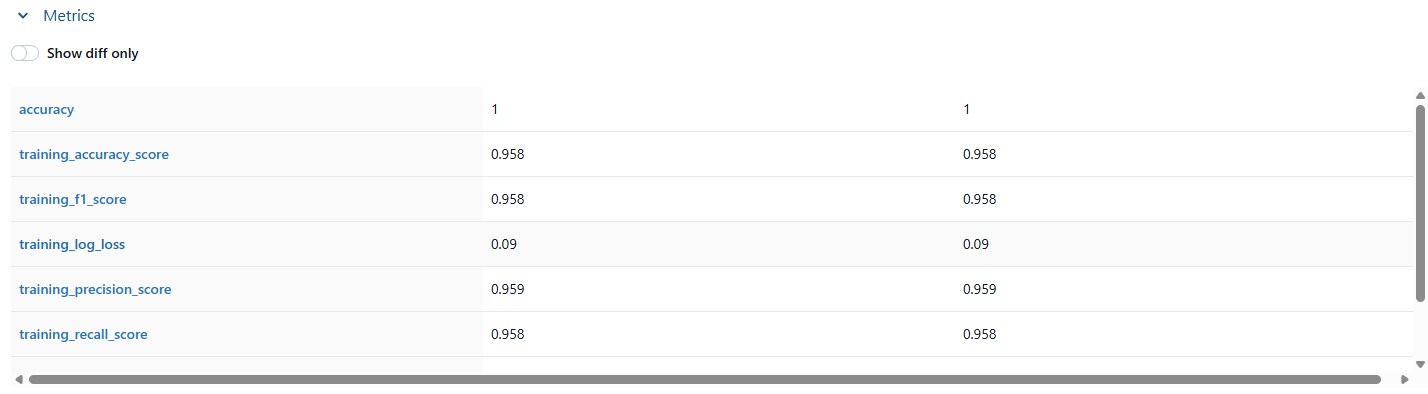

**PERFECT! IT WORKED.** We can see that we get the same exact results with the same hyperparameters. Just like we wanted to. The only real difference is the run-time.

# **Save and reload model**

There are multiple ways to go about saving your models. You can find all of your models logged in their corresponding runs, and you can use the hyperparameters to reconstruct the model, like we did in the rerun_experiment function. If you want to save a specific model somewhere else, you can run the following code with the desired path:

In [10]:
model_uri = "models/my_model"
mlflow.sklearn.save_model(clf, model_uri)

If you later want to reuse your saved model, you simply run the code below:

In [11]:
# Load the model to use it again
loaded_model = mlflow.sklearn.load_model(model_uri)

# Use it to, for example, classify a datapoint
sample_datapoint = iris.data[0].reshape(1, -1)
predicted_class = loaded_model.predict(sample_datapoint)

print("Predicted class:", predicted_class[0])


Predicted class: 0


# **Summary & key takeaways**

**Summary**

In this tutorial we covered MLOps and the importance of reproducibility in machine learning, ensuring experiments can be reliably rerun. We use MLflow to track experiments, log parameters and metrics and manage models. The tutorial demonstrated setting up the environment, loading the Iris dataset, building a Random Forest model, running and comparing multiple experiments and reproducing past runs using MLflow to make ML workflows more reliable and collaborative.

**Key takeaways**

Using MLOps and MLflow makes your machine learning experiments trackable, reproducible, and easy to compare, helping you build reliable models faster and more collaboratively.

#**Sources**


[1] MLOps, *“Machine Learning Operations”*, MLOps, nd. [Online]. Available at: https://ml-ops.org/. [Accessed: 17-Sep-2025]


[2] Chawla, A & Pachaar, A. *“The Full MLOps Blueprint: Reproducibility and Versioning in ML Systems-Part B (With Implementation)”*, DailyDoseOfDS, 2025. [Online]. Available at: https://www.dailydoseofds.com/mlops-crash-course-part-4/. [Accessed: 17-Sep-2025]

[3] MLFlow, *“MLflow: A Tool for Managing the Machine Learning Lifecycle”*, MLFlow, nd. [Online]. Available at: https://mlflow.org/docs/latest/ml/. [Accessed: 17-Sep-2025]


[4] MLFlow, *“Documentation”*, MLFlow, nd. [Online]. Available at: https://mlflow.org/docs/latest/ml/. [Accessed: 17-Sep-2025]



#**Run me!**


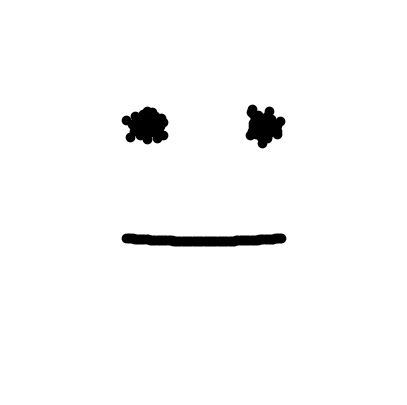

In [12]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
eye_left_x = np.random.normal(0.35, 0.02, 50)
eye_left_y = np.random.normal(0.7, 0.02, 50)

eye_right_x = np.random.normal(0.65, 0.02, 50)
eye_right_y = np.random.normal(0.7, 0.02, 50)
mouth_x = np.linspace(0.3, 0.7, 100)
mouth_y = 0.4 + 0.2*(mouth_x - 0.5)**2

plt.figure(figsize=(5, 5))
plt.scatter(eye_left_x, eye_left_y, color='black')
plt.scatter(eye_right_x, eye_right_y, color='black')
plt.scatter(mouth_x, mouth_y, color='black')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')
plt.show()
